# الوحدة 3: استكشاف البيانات

يحتوي الدليل التعليمي التالي على أمثلة لكود بايثون لاستكشاف البيانات. يجب عليك الرجوع إلى فصل "استكشاف البيانات" من كتاب "مقدمة في تنقيب البيانات" (متاح على https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) لفهم بعض المفاهيم المقدمة في هذه المذكرة التعليمية. يمكن تحميل المذكرة من http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.

يشير استكشاف البيانات إلى التحقيق الأولي في البيانات من أجل فهم خصائصها المحددة بشكل أفضل. هناك دافعان رئيسيان لاستكشاف البيانات:
1. مساعدة المستخدمين على اختيار تقنية المعالجة المسبقة وتحليل البيانات المناسبة للاستخدام.
2. الاستفادة من قدرات البشر في التعرف على الأنماط في البيانات.

اقرأ التعليمات خطوة بخطوة أدناه بعناية. لتنفيذ الكود، انقر على الخلية واضغط على مفتاحي SHIFT-ENTER في آن واحد.

## 3.1. إحصائيات الملخص

إحصائيات الملخص هي كميات، مثل المتوسط والانحراف المعياري، تلتقط خصائص مختلفة لمجموعة كبيرة محتملة من القيم برقم واحد أو مجموعة صغيرة من الأرقام. في هذا الدليل التعليمي، سنستخدم عينة بيانات Iris، والتي تحتوي على معلومات حول 150 زهرة Iris، 50 من كل نوع من أنواع Iris الثلاثة: Setosa و Versicolour و Virginica. تتميز كل زهرة بخمس سمات:

- طول السبلة بالسنتيمتر

- عرض السبلة بالسنتيمتر

- طول البتلة بالسنتيمتر

- عرض البتلة بالسنتيمتر

- الفئة (Setosa، Versicolour، Virginica) 

في هذا الدليل التعليمي، ستتعلم كيفية:

- تحميل ملف بيانات CSV إلى كائن Pandas DataFrame.

- حساب إحصائيات ملخص مختلفة من DataFrame.

لتنفيذ البرنامج النموذجي الموضح هنا، تأكد من تثبيت مكتبة Pandas (انظر الوحدة 2).

**1.** أولاً، تحتاج إلى تحميل <a href="http://archive.ics.uci.edu/ml/datasets/Iris">مجموعة بيانات Iris</a> من مستودع UCI للتعلم الآلي.

**<font color='red'>الكود:</font>** يستخدم الكود التالي Pandas لقراءة ملف CSV وتخزينه في كائن DataFrame يسمى data. بعد ذلك، سيعرض الصفوف الخمسة الأولى من إطار البيانات.

In [15]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data
# data.head() 



,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:

data.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**2.** لكل سمة كمية، احسب المتوسط، والانحراف المعياري، والحد الأدنى، والحد الأقصى للقيم.

**<font color="red">الكود:</font>**

In [17]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** بالنسبة للسمة النوعية (الفئة)، احسب التكرار لكل قيمة من قيمها المميزة.

**<font color="red">الكود:</font>**

In [18]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**4.** من الممكن أيضًا عرض ملخص لجميع السمات في وقت واحد في جدول باستخدام الدالة describe(). إذا كانت السمة كمية، فستعرض المتوسط، والانحراف المعياري، وقيم الشرائح المختلفة (بما في ذلك الحد الأدنى، والوسيط، والحد الأقصى). إذا كانت السمة نوعية، فستعرض عدد قيمها الفريدة والقيم العليا (الأكثر تكرارًا). 

**<font color="red">الكود:</font>**

In [19]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


لاحظ أن العدد (count) يشير إلى عدد القيم غير المفقودة لكل سمة.

**5.** للإحصاءات متعددة المتغيرات، يمكنك حساب التباين المشترك والارتباط بين أزواج السمات.

**<font color="red">الكود:</font>**

In [20]:
print('التباين المشترك:')
data.select_dtypes(include='number').cov()

التباين المشترك:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [21]:
print('الارتباط:')
data.select_dtypes(include='number').corr()

الارتباط:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2. تصور البيانات

تصور البيانات هو عرض المعلومات بتنسيق رسومي أو جدولي. يتطلب التصور الناجح تحويل البيانات (المعلومات) إلى تنسيق مرئي بحيث يمكن تحليل أو الإبلاغ عن خصائص البيانات والعلاقات بين عناصر البيانات أو السمات.

في هذا الدليل التعليمي، ستتعلم كيفية عرض بيانات 
Iris 
التي تم إنشاؤها في القسم 3.1.
لتنفيذ البرنامج النموذجي الموضح هنا، تأكد من تثبيت حزمة مكتبة matplotlib (انظر الوحدة 0 حول كيفية تثبيت حزم Python).

**1.** أولاً، سنعرض المدرج التكراري لسمة طول السبلة عن طريق تقسيمها إلى 8 فئات منفصلة وحساب التكرار لكل فئة.

**<font color="red">الكود:</font>**

<Axes: >

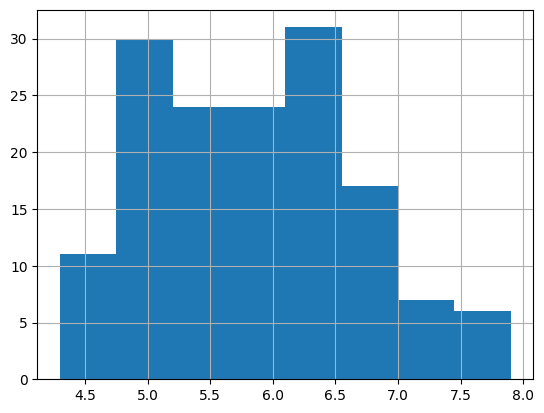

In [22]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** يمكن أيضًا استخدام مخطط الصندوق (boxplot) لإظهار توزيع القيم لكل سمة.

**<font color="red">الكود:</font>**

<Axes: >

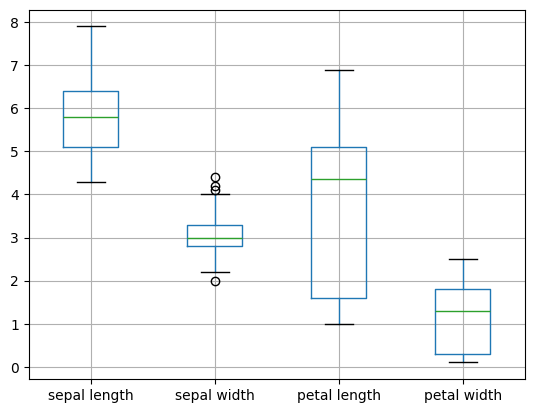

In [23]:
data.boxplot()

**3.** لكل زوج من السمات، يمكننا استخدام مخطط التشتت (scatter plot) لتصور توزيعها المشترك.

**<font color="red">الكود:</font>**

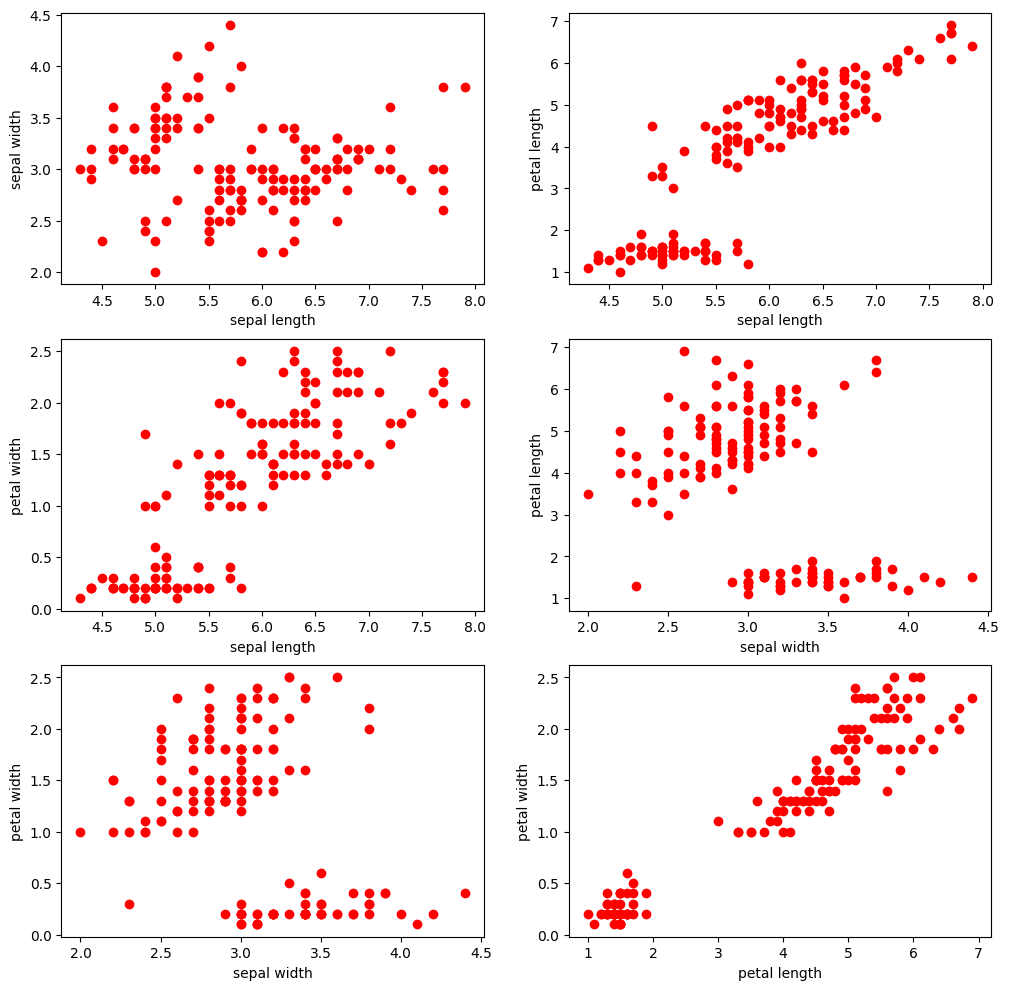

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** يمكن استخدام الإحداثيات المتوازية لعرض جميع نقاط البيانات في وقت واحد. تحتوي الإحداثيات المتوازية على محور إحداثي واحد لكل سمة، لكن المحاور المختلفة تكون متوازية مع بعضها البعض بدلاً من أن تكون متعامدة، كما هو معتاد. علاوة على ذلك، يتم تمثيل الكائن كخط بدلاً من نقطة. في المثال أدناه، يمكن تحديد توزيع القيم لكل فئة بلون منفصل.

**<font color="red">الكود:</font>**

<Axes: >

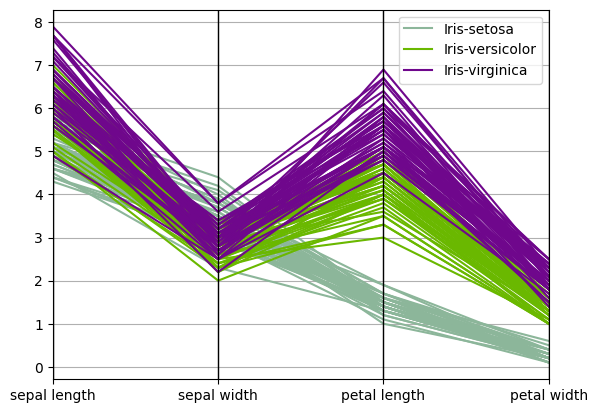

In [27]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. الملخص

يقدم هذا الدليل التعليمي عدة أمثلة لاستكشاف البيانات وتصورها باستخدام حزم مكتبات Pandas و matplotlib المتاحة في Python. 

**<font color='blue'>المراجع:</font>**

1. وثائق عن Pandas. https://pandas.pydata.org/
2. وثائق عن matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). مستودع UCI للتعلم الآلي [http://archive.ics.uci.edu/ml]. إيرفين، كاليفورنيا: جامعة كاليفورنيا، كلية المعلومات وعلوم الكمبيوتر. 